In [ ]:
!pip install fastai

In [2]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [3]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [4]:
(path/"images").ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_154.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_4.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_115.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_180.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_60.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_226.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_194.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_199.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_180.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_109.jpg')...]

In [5]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed=42),
                 get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms = aug_transforms(size=224, min_scale=0.75))

In [6]:
dls = pets.dataloaders(path/"images")

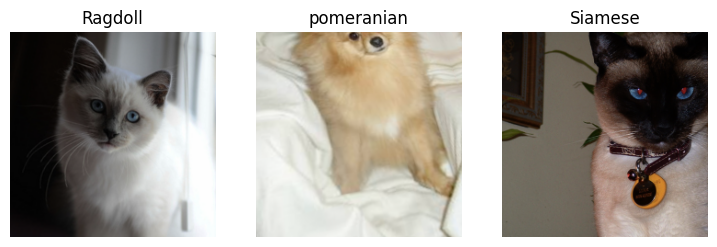

In [7]:
dls.show_batch(nrows=1, ncols=3)

In [11]:
pets.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/saint_bernard_19.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/saint_bernard_19.jpg
    applying partial gives
      saint_bernard
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(30)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(30))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up a

In [9]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

In [10]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.507009,0.308999,0.097429,01:15


epoch,train_loss,valid_loss,error_rate,time
0,0.492488,0.293760,0.096752,01:11
1,0.334239,0.202469,0.060893,01:11
